<a href="https://colab.research.google.com/github/nikxianer/NLP_python_course/blob/main/H1_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this homework assignment I will solve the problem of classifying telecoms churn customers: for each customer I will determine whether or not they will stop using the operator's services in the near future.

In [1]:
import pandas as pd
import numpy as np


df = pd.read_csv("https://raw.githubusercontent.com/nikxianer/NLP_python_course/main/datasets/telecom_churn.csv")
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [33]:
!pip install tpot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 87 kB 3.3 MB/s 
     |████████████████████████████████| 193.6 MB 67 kB/s 
     |████████████████████████████████| 139 kB 47.6 MB/s 
  Created wheel for stopit: filename=stopit-1.1.2-py3-none-any.whl size=11953 sha256=0afc565a294c8c44ff74b891a836c94838c86042d98efe40e3a3b52e6586a160
  Stored in directory: /root/.cache/pip/wheels/a8/bb/8f/6b9328d23c2dcedbfeb8498b9f650d55d463089e3b8fc0bfb2
Successfully built stopit
  Attempting uninstall: xgboost
    Found existing installation: xgboost 0.90
    Uninstalling xgboost-0.90:
      Successfully uninstalled xgboost-0.90


In [34]:
import tpot

Let's do some initial data processing:

1) Discard column State

In [2]:
del df['State']

In [3]:
# computing number of rows
rows = len(df.axes[0])
 
# computing number of columns
cols = len(df.axes[1])
print("Number of Rows: ", rows)
print("Number of Columns: ", cols)

Number of Rows:  3333
Number of Columns:  19


Let's make a simple feature encoding: 

2) Encode the International plan column as follows: Replace "Yes" with 1 and "No" with 0.

In [4]:
df['International plan'] = df['International plan'].map({'Yes' : 1, 'No' : 0})

Encode the Voice mail plan column in the same way.

In [5]:
df['Voice mail plan'] = df['Voice mail plan'].map({'Yes' : 1, 'No' : 0})

3) Translate the target variable (Churn) into numbers: True to 1 and False to 0.

In [6]:
df['Churn'] = df['Churn'].astype(int)

Display the first rows of the modified table to check that all conversions worked.

In [7]:
df.head()

,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


Create a matrix object-character X and a vector with the target variable (Churn) y.

In [8]:
X = df            #Feature Matrix
y = df["Churn"]   #Target Variable

Checking the balance of classes. Is the sample balanced?

**Question:** How many items are in Class 1?

In [9]:
len(y[y==0]), len(y[y==1])

(2850, 483)

Dividing the data into a training part and a test part, the size of the test part is 30%.

In [10]:
from sklearn.model_selection import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3, random_state=123)

For linear models, feature scaling is very important. So 
Scale features with StandardScaler by training the method on training data and applying it to both a trace and a test.

Use the code from the class to reconstruct DataFrames from transformed objects.

In [11]:

from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(Xtrain)

Xtrain = pd.DataFrame(ss.transform(Xtrain), columns=X.columns)
Xtest = pd.DataFrame(ss.transform(Xtest), columns=X.columns)

Train on training data with default parameters:

1) Logistic regression.

2) The K-nearest neighbor method

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model = LogisticRegression()
model.fit(Xtrain, ytrain)

LogisticRegression()

In [17]:
pred_test = model.predict(Xtest)
accuracy_score(ytest, pred_test)

1.0

In [18]:
from sklearn.neighbors import KNeighborsClassifier

model2 = KNeighborsClassifier()

model2.fit(Xtrain, ytrain)

pred_test2 = model2.predict(Xtest)

accuracy_score(ytest, pred_test2)

0.996

In [19]:
model.coef_, model.intercept_

(array([[ 0.03694305, -0.01991973,  0.23999737, -0.10183058, -0.02273003,
          0.14791614,  0.01694512,  0.14792344,  0.06165613,  0.0277305 ,
          0.0616078 ,  0.02091363,  0.00773939,  0.02091011,  0.04035289,
         -0.07350621,  0.04050186,  0.29258348,  4.34670794]]),
 array([-5.35763921]))

In [20]:
coef_table = pd.DataFrame(list(X.columns)).copy()
coef_table.insert(len(coef_table.columns),"Coefs",model.coef_.transpose())

coef_table.sort_values(by='Coefs')

,0,Coefs
3,Voice mail plan,-0.101831
15,Total intl calls,-0.073506
4,Number vmail messages,-0.022730
1,Area code,-0.019920
12,Total night calls,0.007739
6,Total day calls,0.016945
13,Total night charge,0.020910
11,Total night minutes,0.020914
9,Total eve calls,0.027731
0,Account length,0.036943


Using trained models, make predictions on the test data. Calculate the value of the roc-auc metric on the test.

Don't forget that to calculate roc-auc correctly it is necessary to predict not the classes themselves, but their probabilities.

Question: What is the ROC-AUC of the logistic regression, rounded to tenths?

In [22]:
probs = model.predict_proba(Xtest)

In [23]:
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve

In [24]:
confusion_matrix(ytest, pred_test)

array([[866,   0],
       [  0, 134]])

In [25]:
score = roc_auc_score(ytest, probs[:,1])
score

1.0

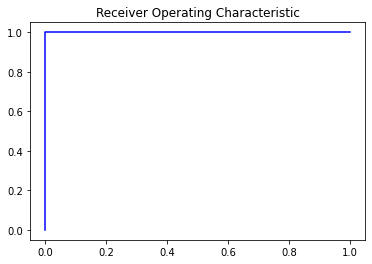

In [26]:
import matplotlib.pyplot as plt

fpr, tpr, threshold = roc_curve(ytest, probs[:,1])
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % score)

## Bonus. Selection of model hyperparameters.

Machine learning models have hyperparameters, which are values that a human sets before the models are trained. The selection of hyperparameters can have a significant impact on the quality of the models.

Now your goal is to improve the models as much as possible. To do this:

1) in logistic regression, pick the hyperparameter C (go through 20 values of C ranging from 0.1 to 10 in equal increments).

2) For the nearest neighbor method, select the number of neighbors n_neighbors (look for hyperparameter values ranging from 1 to 20 in increments of 1).

The selection of hyperparameters is performed on training data only!

After selecting the hyperparameters, train the models with the found hyperparameters on the training data, make predictions on the test and evaluate their quality (roc_auc).

In [35]:
from tpot import TPOTClassifier
tpot_clf = TPOTClassifier(generations=100, population_size=100, 
                          verbosity=2, offspring_size=100, scoring='accuracy', cv=6)
#Training and prediction

tpot_clf.fit(Xtrain, ytrain)
tpot_pred = tpot_clf.score(Xtest, ytest)

Optimization Progress:   0%|          | 0/10100 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 1.0

Generation 2 - Current best internal CV score: 1.0

Generation 3 - Current best internal CV score: 1.0


TPOT closed during evaluation in one generation.


TPOT closed prematurely. Will use the current best pipeline.

Best pipeline: DecisionTreeClassifier(input_matrix, criterion=entropy, max_depth=4, min_samples_leaf=15, min_samples_split=6)


Which model performed best on the roc_auc metric?

Draw the roc-curve for the best model.

Compare between the two best models:

1) how much difference is the quality of prediction on the test data?
(calculate the difference of the roc-auc values on the test data)

2) construct a histogram of the importance of the features for the logistic regression. Which three features are most important to the model?

This is how you can build a histogram

In [ ]:
features = X.columns
importances = np.abs(lr.coef_[0])
indices = np.argsort(importances)

plt.title('Feature Importances of LogisticRegression')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

Draw conclusions:

1) Is the data balanced? What does this mean?

2) Which model, after fitting hyperparameters, best solves the problem in terms of roc-auc metrics?